# Introduction          

In this assignment we explore digital fourier transform with windowing. This is used to  make the signal square integrable, and more specifically, that the function goes sufficiently rapidly towards 0.

Windowing a simple waveform like $cos(\omega t)$, causes its fourier transform to develop non-zero value at frequencies other than $\omega$. This is called *Spectral Leakage*. This can cause in some applications the stronger peak to smear the weaker contounter parts. So choosing proper windowing functions is essential. The windowing function we use is called **Hamming window** which is generally used in *narrow-band applications*.


## Analysing the Properties of Hamming Window


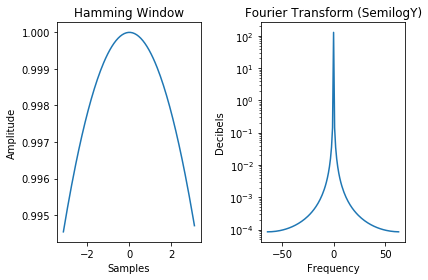

In [34]:
from pylab import *
n = linspace(-pi, pi, 129)[:-1]
dt = n[1] - n[0];fmax = 1/dt
win = (0.54 + 0.46*cos(2*pi*n/128))
Y = fftshift(fft(win))
w = linspace(-pi*fmax, pi*fmax, 129)[:-1]
subplot(1,2,1)
title('Hamming Window')
xlabel('Samples')
ylabel('Amplitude')
plot(n, win)
subplot(1,2,2)
xlabel('Frequency')
ylabel('Decibels')
title('Fourier Transform (SemilogY)')
semilogy(w, abs(Y))
tight_layout()
show()

## Working through the examples given in the report 

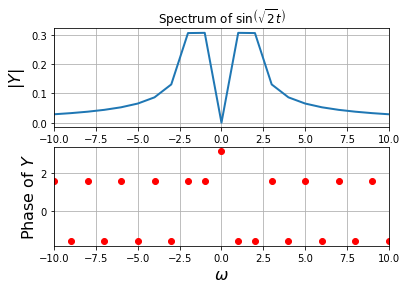

In [35]:
from pylab import *
t = linspace(-pi, pi, 65);t = t[:-1]
dt = t[1] - t[0]; fmax = 1/dt
y = sin(sqrt(2)*t)
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/64.0
w = linspace(-pi*fmax, pi*fmax, 65)[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

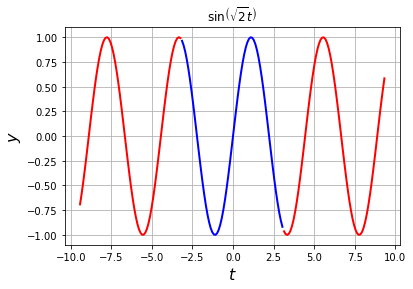

In [36]:
t1 = linspace(-pi, pi, 65); t1 = t1[:-1]
t2 = linspace(-3*pi, -pi, 65); t2 = t2[:-1]
t3 = linspace(pi, 3*pi, 65); t3 = t3[:-1]
plot(t1, sin(sqrt(2)*t1), 'b', lw=2)
plot(t2, sin(sqrt(2)*t2), 'r', lw=2)
plot(t3, sin(sqrt(2)*t3), 'r', lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
show()

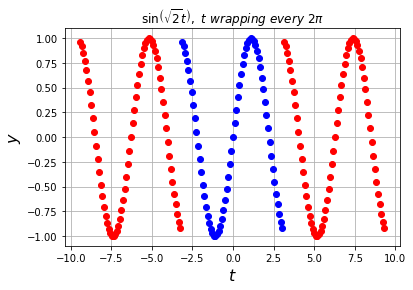

In [37]:
plot(t1, sin(sqrt(2)*t1), 'bo', lw=2)
plot(t2, sin(sqrt(2)*t1), 'ro', lw=2)
plot(t3, sin(sqrt(2)*t1), 'ro', lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right),\ t\ wrapping\ every\ 2\pi$")
grid(True)
show()

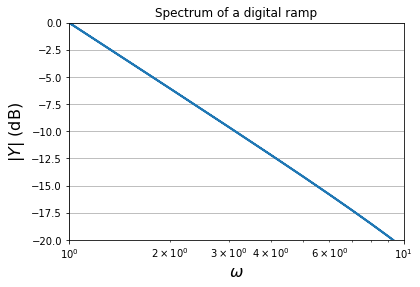

In [38]:
t = linspace(-pi, pi, 65)[:-1]
dt = t[1] - t[0]; fmax = 1/dt
y = t
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/64.0
figure()
semilogx(abs(w), 20*log10(abs(Y)), lw=2)
xlim([1, 10])
ylim([-20, 0])
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
show()

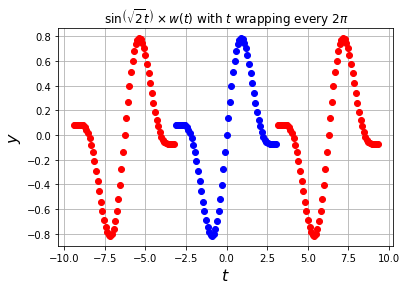

In [39]:
t2 = linspace(-3*pi, -pi, 65)[:-1]
t3 = linspace(pi, 3*pi, 65)[:-1]
n = arange(64)
wnd = fftshift(0.54+0.46*cos(2*pi*n/63))
y = sin(sqrt(2)*t1)*wnd
figure(3)
plot(t1, y, 'bo', lw=2)
plot(t2, y, 'ro', lw=2)
plot(t3, y, 'ro', lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

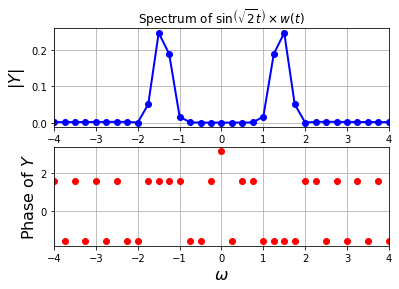

In [40]:
t = linspace(-4*pi, 4*pi, 257)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
n = arange(256)
wnd = fftshift(0.54+0.46*cos(2*pi*n/256))
y = sin(sqrt(2)*t)
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

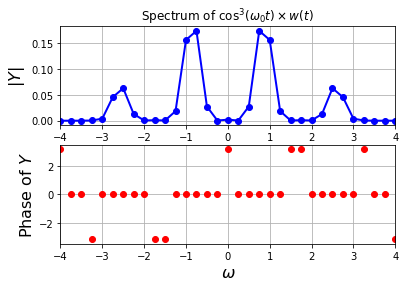

In [41]:
t = linspace(-4*pi, 4*pi, 257)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
n = arange(256)
wnd = fftshift(0.54+0.46*cos(2*pi*n/256))
y = cos(0.86*t)**3
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\cos^3(\omega_0t)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

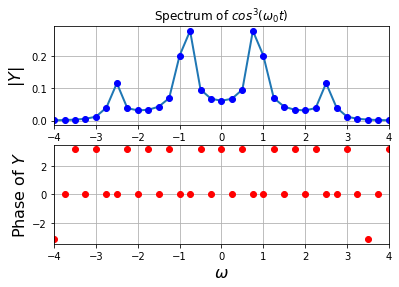

In [42]:
t = linspace(-4*pi, 4*pi, 257);t = t[:-1]
dt = t[1] - t[0]; fmax = 1/dt
y = cos(0.86*t)**3
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/256.0
w = linspace(-pi*fmax, pi*fmax, 257)[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),w, abs(Y), 'bo', lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $cos^3(\omega_0 t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

Here we can see clear differences between the windowed fourier transform and fourier transform without application of windows. Peak is being smeared by the windowing function but the stary high frequency components are attenuated by the window function. The *spectral leakage* can also be noticed.


### Estimating $\omega$ and $\delta$ from fourier spectrum

According to the question the if the spectra is obtained, the resolution is not enough to obtain the $\omega_0$ directly. The peak will not be visible clearly because of the fact that resolution of the frequecny axis is not enough. So a statistic is necessary to estimate value of $\omega_0$ 

The statistic is

Let,


\begin{equation}
\mu = Mean(|Y(\omega)|)
\end{equation}

\begin{equation}
\sigma = Standard\ Deviation(|Y(\omega)|)
\end{equation}

\begin{equation}
\omega_0 = \frac{\sum \omega_i |Y(\omega_i)|}{\sum |Y(\omega_i)|} \\
\\
\forall \omega_i\ where\ |Y(\omega_i)| > \mu + 0.1\sigma
\end{equation}


Which is essentially the weighted average of $\omega$ where weights are $|Y(\omega)|$ subject to constraint that $|Y(j\omega)|$ must be greater than a value as specified in the formula.


Now, $\delta$ can be found be least square fitting of


\begin{equation}
y(t) = A\cos(\omega_0 t) + B\sin(\omega_0 t)
\end{equation}

Minimizing L2-norm to find the coefficients $A, B$, we can compute $\delta$ by,

\begin{equation}
\delta = -\tan^{-1}(\frac{B}{A})
\end{equation}


Depicting this for $\omega$ < 1 rad/s and in the next example, we will depict it for $\omega$ > 1 rad/s.

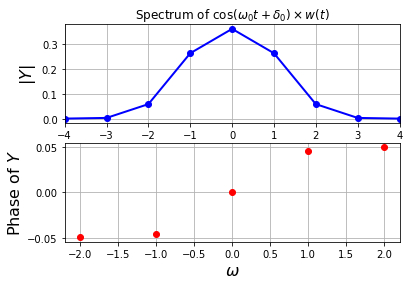

In [43]:
t = linspace(-pi, pi, 129)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
n = arange(128)
wnd = fftshift(0.54+0.46*cos(2*pi*n/128))
w_0_r = 0.7
delta_r = 0.05
y = cos(w_0_r*t +delta_r)
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/128.0
w=linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
phase_ii = np.where(Y > 0.05)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\cos(\omega_0t + \delta_0)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w[phase_ii],angle(Y[phase_ii]),'ro',lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

In [44]:
mean_Y = mean(abs(Y))
std_Y = std(abs(Y))
Y_needed = abs(Y[where(abs(Y) > mean_Y + 0.1*std_Y)])
w_needed = w[where(abs(Y) > mean_Y + 0.1*std_Y)]
w_0 = sum(Y_needed*abs(w_needed))/sum(abs(Y_needed))

In [45]:
x_1 = cos(w_0*t)
x_2 = sin(w_0*t)
A = np.vstack([x_1, x_2]).T
cos_d, sin_d = lstsq(A, y)[0]

In [46]:
delta = arctan(-(sin_d)/cos_d)

In [47]:
print ("Predicted")
print ("Delta "+  "%.3f" %delta + "\t Circular Frequency: %.3f" %(w_0))
print ("Actual")
print ("Delta " + str(delta_r) + "\t Circular Frequency: " + str(w_0_r))

Predicted
Delta 0.053	 Circular Frequency: 0.758
Actual
Delta 0.05	 Circular Frequency: 0.7


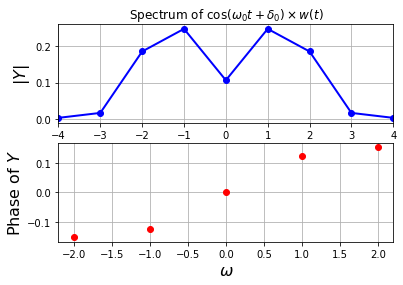

In [48]:
t = linspace(-pi, pi, 129)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
n = arange(128)
wnd = fftshift(0.54+0.46*cos(2*pi*n/128))
w_0_r = 1.3
delta_r = 0.15
amp_noise = 0.1
y = cos(w_0_r*t +delta_r) + amp_noise*randn(len(t))
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/128.0
w=linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
phase_ii = np.where(Y > 0.05)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\cos(\omega_0t + \delta_0)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w[phase_ii],angle(Y[phase_ii]),'ro',lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

In [49]:
mean_Y = mean(abs(Y))
std_Y = std(abs(Y))
Y_needed = abs(Y[where(abs(Y) > mean_Y + 0.1*std_Y)])
w_needed = w[where(abs(Y) > mean_Y + 0.1*std_Y)]
w_0 = sum(Y_needed*abs(w_needed))/sum(abs(Y_needed))

In [50]:
x_1 = cos(w_0*t)
x_2 = sin(w_0*t)
A = np.vstack([x_1, x_2]).T
cos_d, sin_d = lstsq(A, y)[0]

In [51]:
delta = arctan(-(sin_d)/cos_d)

In [52]:
print ("Predicted")
print ("Delta "+  "%.3f" %delta + "\t Circular Frequency: %.3f" % w_0)
print ("Actual")
print ("Delta " + str(delta_r) + "\t Circular Frequency: " + str(w_0_r))

Predicted
Delta 0.080	 Circular Frequency: 1.329
Actual
Delta 0.15	 Circular Frequency: 1.3


## Analysis of Chirped Signal Spectrum

162.974661726


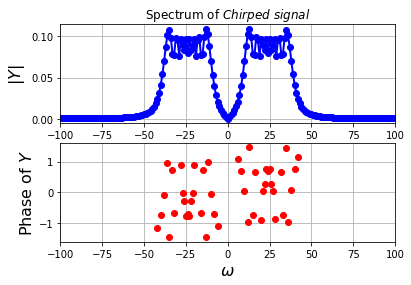

In [53]:
t = linspace(-pi, pi, 1025)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
print(fmax)
n = arange(1024)
wnd = 1#fftshift(0.54+0.46*cos(2*pi*n/1024))
y = cos(16*(1.5 + t/(2*pi))*t)
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/1024.0
w=linspace(-pi*fmax,pi*fmax,1025);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
phase_ii = np.where(Y > 0.005)
xlim([-100,100])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $Chirped\ signal$")
grid(True)
subplot(2,1,2)
plot(w[phase_ii],angle(Y[phase_ii]),'ro',lw=2)
xlim([-100, 100])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

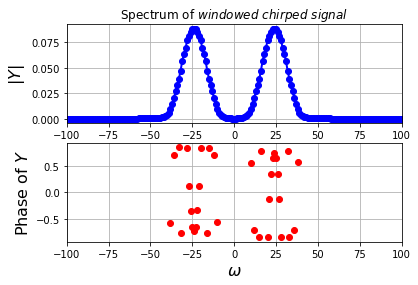

In [54]:
t = linspace(-pi, pi, 1025)[:-1]
dt = (t[1] - t[0]); fmax = 1/dt
n = arange(1024)
wnd = fftshift(0.54+0.46*cos(2*pi*n/1024))
y = cos(16*(1.5 + t/(2*pi))*t)
y *= wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/1024.0
w=linspace(-pi*fmax,pi*fmax,1025);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
phase_ii = np.where(Y > 0.005)
xlim([-100,100])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $windowed\ chirped\ signal$")
grid(True)
subplot(2,1,2)
plot(w[phase_ii],angle(Y[phase_ii]),'ro',lw=2)
xlim([-100, 100])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

In [55]:
def fft_signal(np, f, ll, ul, win = True):
    t = linspace(ll, ul, np+1)[:-1]
    dt = t[1] - t[0] ; fmax = 1/dt
    n = arange(np) 
    y = f(t)
    if win:
        wnd = fftshift(0.54 + 0.46*cos(2*pi*n/np))
        y *= wnd
    Y = fftshift(fft(y))/np
    w = linspace(ll*fmax, ul*fmax, np+1)[:-1]
    return (w, abs(Y), angle(Y))

In [56]:
def chirp(t):
    return cos(16*(1.5 + t/(2*pi))*t)

In [57]:
w = []
mag = []
phase = []
t_ = []
npts = 64
samples = linspace(-pi, pi, 1025)[:-1]
sample_width = 2*pi/1025
Y_time = []
Phi_time = []
time_samples = samples[0:npts]
dt = time_samples[1] - time_samples[0];f = 1/dt
w = linspace(-pi*f, pi*f, npts)
# print(len(samples) - npts +1)
for i in range(len(samples) - npts +1):
    time_samples = samples[i:i+npts]
    dt = time_samples[1] - time_samples[0];fmax = 1/dt
    n = arange(npts)
    y = chirp(time_samples)
    wnd = fftshift(0.54 + 0.46*cos(2*pi*n/npts))
    y *= wnd
#     w = linspace(time_samples[0]*sample_width*fmax, time_samples[-1]*sample_width*fmax, np+1)[:-1]
    Y = fftshift(fft(y))/npts
    Y_time.append(abs(Y))
    Phi_time.append(angle(Y))

Form the 1024  dimentional vector, we take 64 dimentional sub-vector, and find the fourier transform and we will see how it evolves in time.

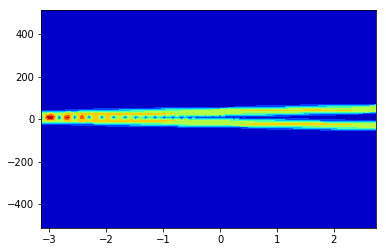

In [58]:
tt,ww = meshgrid(samples[:961], w)
plt.contourf(tt, ww,np.array(Y_time).T, cmap = 'jet')
show()

We see that the magnitude of the fourier transform splits as time progresses as the frequency of the signal increases. The image below is the phase plot of the fourier transform of the chirp signal.

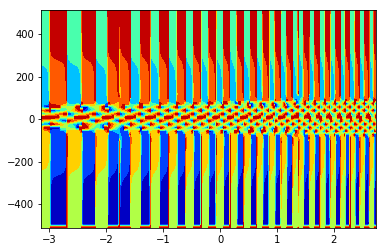

In [59]:
plt.contourf(tt, ww, np.array(Phi_time).T, cmap = 'jet')
show()

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [61]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(tt, ww, np.array(Y_time).T, cmap=cm.jet)
ax.set_xlabel()
show()

TypeError: set_xlabel() missing 1 required positional argument: 'xlabel'

This is the 3-d surface plot of the magnitude of fourier transform plotted versus time and frequency. Here we observe strong peaks and  as infered from the contour plot of the magnitude spectrum we see 2 lobes whose separation increases as time increases.

## Conclusion

Here in this assignment we implemented windowed fourier transform and also understood the need for windowing and also effects of windowing. Moreover, we implemented **Short Time Fourier Transform** and witnessed how  fourier transform evolves in time.